<img style="float: left;opacity:0.5;" src="img/airbnb-logo.png"><img style="float: right;opacity:0.5;" src="img/logo.png">

<h1 style="color:#c93658;"> Analisando Dados do Airbnb - Berlim | Alemanha </h1>

O Airbnb é uma plataforma onde anfitriões podem anunciar suas acomodações de qualquer parte do mundo, para que viajantes ou até moradores locais possam ficar hospedados. Diante de toda informação disponível no site, Murray Cox construiu o <a style="color:#ea9085;text-decoration:none;" href="http://insideairbnb.com/">Inside Airbnb</a>, um projeto que extraiu as informações públicas disponíveis no Airbnb de diversas cidades para que possam ser utilizados para a análise. Você pode encontrar datasets de outras cidades na aba <a style="color:#ea9085;text-decoration:none;" href="http://insideairbnb.com/get-the-data.html">Get the Data</a>.

<h2 style="color:#df869b;">Índice do Projeto</h2> 

**1** - <a style="color:#651b2c; text-decoration:none;" href="#sobre-berlim">Sobre Berlim, Alemanha</a>   
**2** - <a style="color:#651b2c; text-decoration:none;" href="#Problema-a-ser-analisado">Problema a ser analisado</a>  
**3** - <a style="color:#651b2c; text-decoration:none;" href="#obtencao-dos-dados">Obtenção dos Dados</a>  
**4** - <a style="color:#651b2c; text-decoration:none;" href="#preprocessing">Pré-processamento dos Dados</a>   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**4.1** - <a style="color:#651b2c; text-decoration:none;" href="#Deletando-os-valores-nulos">Deletando valores nulos</a>  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**4.2** - <a style="color:#651b2c; text-decoration:none;" href="#Analisando-as-variaveis">Analisando as variáveis</a>  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**4.3** - <a style="color:#651b2c; text-decoration:none;" href="#Detectando-e-tratando-outliers">Detectando e tratando outliers</a>  
**5** - <a style="color:#651b2c; text-decoration:none;" href="#analise-dos-dados">Análise dos Dados</a>   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**5.1** - <a style="color:#651b2c; text-decoration:none;" href="#media-diaria">Qual a média da diária em Berlim?</a>  

<a id="sobre-berlim"></a><h2 style="color:#df869b;"> Sobre Berlim, Alemanha </h2>
<img src="img/germany.jpg" style="opacity:0.80">

<h2 style="color:#df869b;">Problema a ser analisado</h2>

Se você atender os critérios do Airbnb para ser um anfitrião, isso possibilita de você anunciar seu apartamento, sua casa, ou até um quarto que está disponível para que outras pessoas possam alugar por um tempo determinado. Levando isso em consideração, iremos analisar as seguintes questões:  

**- Qual a média da diária em Berlim?**  
**- Quais são os bairros mais caros? E os mais baratos?**  
**- De que forma as acomodações estão distribuidas pela cidade?**

<a id="obtencao-dos-dados"></a><h2 style="color:#df869b;">Obtenção dos dados</h2>


Os dados utilizados nesse projeto foi disponibilizado no site Inside Airbnb, o arquivo carregado foi o <a style="color:#ea9085;text-decoration:none;" href="http://data.insideairbnb.com/germany/be/berlin/2020-05-14/data/listings.csv.gz">lists.csv.gz</a> que contém os dados detalhados sobre a cidade de Berlim no Airbnb.

In [1]:
#importando as bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt

#importando os dados para um dataframe
df = pd.read_csv('data/listings.csv')

#visualizando as primeiras entradas do dataframe
df.head()

c:\users\gabriela\pictures\datasc~1\env\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20200514190820,2020-05-15,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,f,f,strict_14_with_grace_period,f,f,7,7,0,0,2.65
1,3176,https://www.airbnb.com/rooms/3176,20200514190820,2020-05-15,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.09
2,3309,https://www.airbnb.com/rooms/3309,20200514190820,2020-05-15,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.33
3,7071,https://www.airbnb.com/rooms/7071,20200514190820,2020-05-15,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,f,f,moderate,f,f,2,0,2,0,2.24
4,9991,https://www.airbnb.com/rooms/9991,20200514190820,2020-05-15,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,"THE APPARTMENT - 4 bedroom (US, Germany: 5 roo...",4 bedroom with very large windows and outstand...,none,Prenzlauer Berg is an amazing neighbourhood wh...,...,f,f,moderate,f,f,1,1,0,0,0.14


<a name="preprocessing" style="text-decoration:none;"></a><h2 style="color:#df869b;">Pré-processamento dos dados</h2>

Nesta etapa iremos conhecer nossos dados, verificar possíveis outliers, valores faltantes ou inconsistências nos dados. Começaremos verificando com quantas entradas e variáveis estamos trabalhando:

In [2]:
print('Este dataset possui {linhas} entradas  e {colunas} variáveis.'.format(linhas=df.shape[0], colunas=df.shape[1]))

Este dataset possui 24678 entradas  e 106 variáveis.


A qualidade dos nossos dados é um fator extremamente importante nas análises, com isso, iremos verificar sobre a ausência de dados faltantes e outliers.

In [3]:
nulos = [i for i in df.columns if df[i].isnull().any()]

df_nulos = df[nulos].copy()

df_nulos.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,reviews_per_month
0,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",...,93.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,NaN,2.65
1,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any questions prior to bookin...,"It’s a non smoking flat, which likes to be tre...",...,93.0,9.0,9.0,9.0,9.0,10.0,9.0,NaN,NaN,1.09
2,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,"My flat is in the middle of West-Berlin, direc...",The flat is a strictly non-smoking facility! A...,The public transportation is excellent: Severa...,I do have a strictly non-smoker-flat. Keep th...,I'm working as a freelancing photographer. My ...,House-Rules and Information ..............(deu...,...,89.0,9.0,9.0,9.0,10.0,9.0,9.0,NaN,NaN,0.33
3,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,"Great neighborhood with plenty of Cafés, Baker...",I hope you enjoy your stay to the fullest! Ple...,Best access to other parts of the city via pub...,"The guests have access to the bathroom, a smal...",I am glad if I can give you advice or help as ...,Please take good care of everything during you...,...,97.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,NaN,2.24
4,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,"THE APPARTMENT - 4 bedroom (US, Germany: 5 roo...",4 bedroom with very large windows and outstand...,Prenzlauer Berg is an amazing neighbourhood wh...,NaN,Excellent location regarding public transport ...,All amenities shared - nothing off limits,Guests will have the whole apartment to themse...,NaN,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,03/Z/RA/003410-18,NaN,0.14


De acordo com as questões levantadas na seção 'Questões a serem analisadas', iremos visualizar nossas features e selecionar as que melhor podem descrever nossos problemas.

In [4]:
list(df.columns.values)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [5]:
df_clean = df[['experiences_offered', 'latitude', 'longitude', 'property_type','room_type',
              'accommodates', 'bathrooms', 'bedrooms', 'price','neighbourhood','minimum_nights', 'maximum_nights']].copy()

Depois de criar nosso dataframe, é hora de analisar a possível presença de valores nulos ou outliers.

In [6]:
df_clean.isnull().sum() / df_clean.shape[0]

experiences_offered    0.000000
latitude               0.000000
longitude              0.000000
property_type          0.000000
room_type              0.000000
accommodates           0.000000
bathrooms              0.000851
bedrooms               0.001864
price                  0.000000
neighbourhood          0.000000
minimum_nights         0.000000
maximum_nights         0.000000
dtype: float64

In [7]:
bathroom_nan = df_clean.bathrooms.isnull().sum()
bedrooms_nan = df_clean.bedrooms.isnull().sum()

print("A quantidade de valores nulos nas variáveis bathrooms e bedrooms são:")
print("Bathrooms: {qntd}".format(qntd = bathroom_nan))
print("Bedrooms: {qntd}".format(qntd = bedrooms_nan))
print("Porcentagem de acordo com o tamanho do dataframe: {qntd}".format(qntd = ((bathroom_nan + bedrooms_nan)/df_clean.shape[0])* 100 ))

A quantidade de valores nulos nas variáveis bathrooms e bedrooms são:
Bathrooms: 21
Bedrooms: 46
Porcentagem de acordo com o tamanho do dataframe: 0.2714968798119783


<h3 style="color:#c93658">Deletando os valores nulos</h3>

Como os valores nulos representam apenas 0,27% do nosso dataset, iremos deleta-los.

In [8]:
df_clean = df_clean.dropna()

In [9]:
df_clean.isnull().sum()

experiences_offered    0
latitude               0
longitude              0
property_type          0
room_type              0
accommodates           0
bathrooms              0
bedrooms               0
price                  0
neighbourhood          0
minimum_nights         0
maximum_nights         0
dtype: int64

<h3 style="color:#c93658">Analisando as variaveis</h3>

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24614 entries, 0 to 24677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   experiences_offered  24614 non-null  object 
 1   latitude             24614 non-null  float64
 2   longitude            24614 non-null  float64
 3   property_type        24614 non-null  object 
 4   room_type            24614 non-null  object 
 5   accommodates         24614 non-null  int64  
 6   bathrooms            24614 non-null  float64
 7   bedrooms             24614 non-null  float64
 8   price                24614 non-null  object 
 9   neighbourhood        24614 non-null  object 
 10  minimum_nights       24614 non-null  int64  
 11  maximum_nights       24614 non-null  int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 2.4+ MB


A partir das informações do dataset, podemos ver que a variável `price` está como String. Vamos converter ela um tipo que possamos trabalhar com ela como valor.

In [11]:
df_clean['price'] = df_clean['price'].str.replace('$', '')

In [12]:
df_clean['price'] = df_clean['price'].str.replace(',', '')

In [13]:
df_clean['price'] = df_clean['price'].astype(float)

In [14]:
df_clean.dtypes

experiences_offered     object
latitude               float64
longitude              float64
property_type           object
room_type               object
accommodates             int64
bathrooms              float64
bedrooms               float64
price                  float64
neighbourhood           object
minimum_nights           int64
maximum_nights           int64
dtype: object

Depois de conhecer um pouco sobre os tipos de variáveis que estamos trabalhando, vamos visualizar as variáveis numéricas a partir de histogramas:

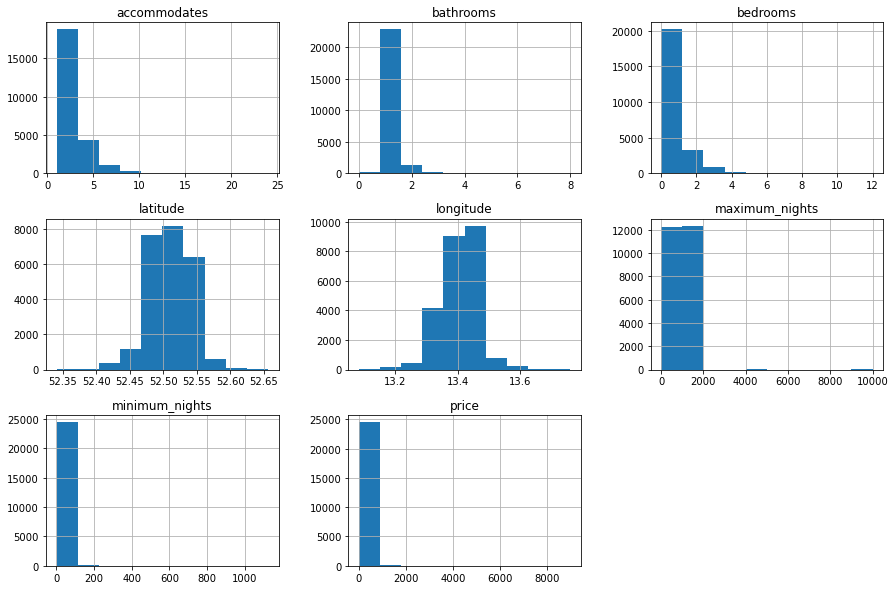

In [15]:
df_clean.hist(figsize=(15,10));

Visualizando estes histogramas, podemos verificar as seguintes inconsistências:  

- O **minimo de noites** elevado, geralmente as pessoas alugam um local para ficar 2, 3 dias ou talvez um mês.  
- O **preço** da diária está com alguns valores acima de mil dolares por dia.  

Agora, iremos visualizar o boxplot para verificar os outliers.

<h3 style="color:#c93658">Detectando e tratando outliers</h3>

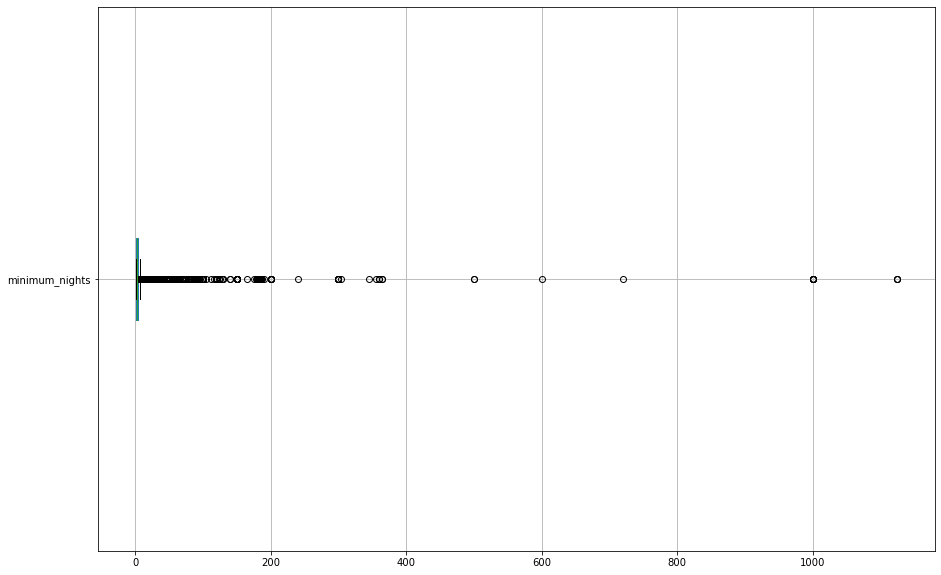

In [16]:
df_clean.boxplot(column='minimum_nights', figsize=(15,10), vert=False)

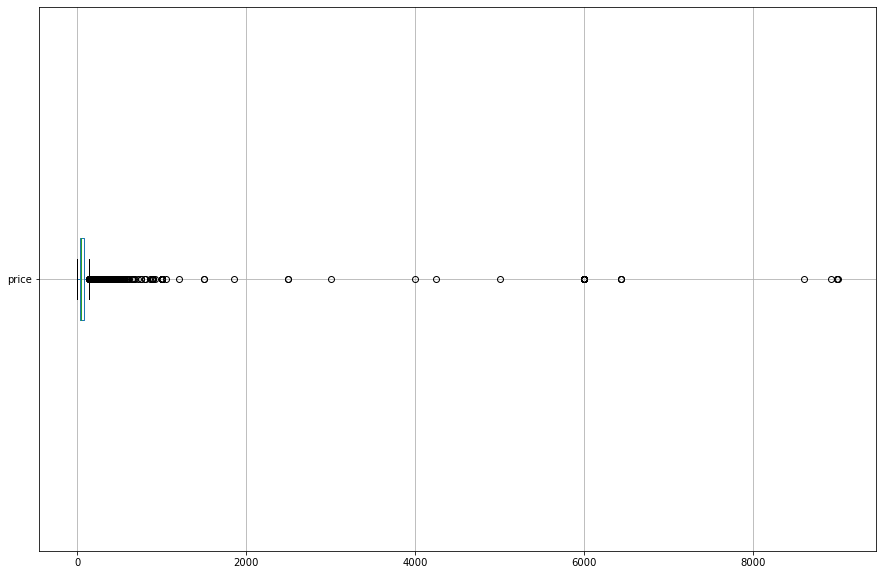

In [17]:
df_clean.boxplot(column='price', figsize=(15,10), vert=False)

In [18]:
df_clean.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,price,minimum_nights,maximum_nights
count,24614.000000,24614.000000,24614.000000,24614.000000,24614.000000,24614.000000,24614.000000,24614.000000
mean,52.510107,13.405864,2.693467,1.103965,1.162631,75.160031,7.390672,599.602340
std,0.031665,0.059834,1.590078,0.344994,0.676254,240.292750,27.998833,547.751502
min,52.340480,13.085630,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,52.489100,13.373373,2.000000,1.000000,1.000000,35.000000,2.000000,21.000000
50%,52.509730,13.416110,2.000000,1.000000,1.000000,50.000000,3.000000,1123.000000
75%,52.533120,13.439588,3.000000,1.000000,1.000000,79.000000,4.000000,1125.000000
max,52.656630,13.758420,24.000000,8.000000,12.000000,9000.000000,1124.000000,10000.000000


Ao analisar como estão distribuidos os dados pelos valores, conseguimos ver que 75% das acomodações estão entre 0 e 79 dólares e a quantidade mínima de noites estão entre 1 e 4.  

Agora, iremos tratar as seguintes inconsistências:  

*- Preços iguais a 0*    
*- Preços maiores que $300*   
*- Noites maiores que 7*  

In [19]:
# verificando quantidade de diária a $0

(df_clean['price'] == 0).sum()

6

In [20]:
# verificando a quantidade de diárias maiores que $300 

(df_clean['price'] > 300).sum()

270

In [21]:
# verificando a quantidade de noites maiores que 
(df_clean['minimum_nights'] > 7).sum()

2900

In [22]:
soma = ((df_clean['price'] == 0).sum()) + ((df_clean['price'] > 300).sum()) + ((df_clean['minimum_nights'] > 7).sum())
porcentagem = (soma / df.shape[0]) * 100
porcentagem

12.869762541534971

In [23]:
df_clean = df_clean.drop(df_clean[df_clean['price'] == 0].index)

In [24]:
df_clean = df_clean.drop(df_clean[df_clean['price'] > 300].index)

In [25]:
df_clean = df_clean.drop(df_clean[df_clean['minimum_nights'] > 7].index)

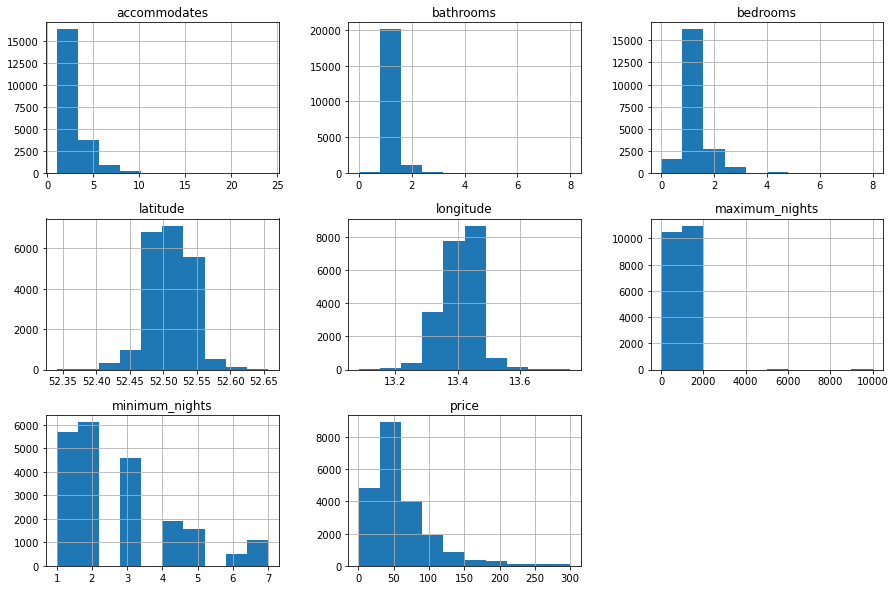

In [26]:
df_clean.hist(figsize=(15,10));

Antes de iniciar nossas análises, iremos salvar nosso dataframe com as mudanças feitas até aqui. Caso precise usar outra vez, não precisará da etapa de pré-processamento.

In [27]:
df_clean.to_csv('data/berlim_airbnb.csv')

<a id="analise-dos-dados"></a><h2 style="color:#df869b;">Análise dos dados</h2>
Depois do pré-processamento dos nossos dados, vamos começar a analisar nossos problemas.  

<a id="media-diaria"></a><h4 style="color:#c93658;"> Qual a média da diária em Berlim? </h4>

In [28]:
# criando uma cópia do nosso dataframe limpo
df = df_clean.copy()

In [29]:
print('A média da diária em Berlim é ${valor}'.format(valor=round(df.price.mean(), 2)))

A média da diária em Berlim é $62.55


Para uma melhor visualização iremos plotar um gráfico para a média dos bairros.  

In [55]:
dict(df['neighbourhood'].value_counts())

{'Neukölln': 3173,
 'Prenzlauer Berg': 2728,
 'Friedrichshain': 2556,
 'Kreuzberg': 2522,
 'Mitte': 1968,
 'Wedding': 1472,
 'Schöneberg': 964,
 'Charlottenburg': 781,
 'Moabit': 768,
 'Wilmersdorf': 436,
 'Pankow': 279,
 'Tempelhof': 262,
 'Rummelsburg': 253,
 'Weißensee': 231,
 'Lichtenberg': 183,
 'Tiergarten': 179,
 'Alt-Treptow': 168,
 'Reinickendorf': 145,
 'Steglitz': 144,
 'Westend': 133,
 'Lichterfelde': 111,
 'Friedrichsfelde': 97,
 'Friedenau': 94,
 'Britz': 86,
 'Zehlendorf': 73,
 'Baumschulenweg': 72,
 'Köpenick': 70,
 'Karlshorst': 68,
 'Niederschönhausen': 65,
 'Halensee': 60,
 'Plänterwald': 57,
 'Oberschöneweide': 55,
 'Grunewald': 48,
 'Tegel': 48,
 'Fennpfuhl': 48,
 'Mariendorf': 46,
 'Alt-Hohenschönhausen': 45,
 'Schmargendorf': 45,
 'Hansaviertel': 40,
 'Marzahn': 38,
 'Biesdorf': 37,
 'Rudow': 34,
 'Potsdamer Platz': 32,
 'Mahlsdorf': 31,
 'Hakenfelde': 28,
 'Rahnsdorf': 27,
 'Wannsee': 26,
 'Wittenau': 26,
 'Buckow': 25,
 'Dahlem': 25,
 'Adlershof': 25,
 'Johanni

In [77]:
neighbourhoods = [
    'Neukölln',
    'Prenzlauer Berg',
    'Friedrichshain',
    'Kreuzberg',
    'Mitte',
    'Wedding',
    'Schöneberg',
    'Charlottenburg',
    'Moabit'
]

df_1 = pd.DataFrame(columns = list(df.columns))

for neighbourhood in neighbourhoods:
    df_2 = df.loc[df['neighbourhood'] == neighbourhood]
    pd.concat([df_1, df_2])

df_2

,experiences_offered,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,price,neighbourhood,minimum_nights,maximum_nights
20,none,52.52195,13.35590,Apartment,Entire home/apt,4,1.0,1.0,62.0,Moabit,3,1125
87,none,52.53083,13.34221,Apartment,Private room,4,1.0,1.0,36.0,Moabit,2,90
152,none,52.52183,13.33318,Apartment,Entire home/apt,5,1.0,1.0,175.0,Moabit,3,21
183,none,52.52387,13.35781,Apartment,Entire home/apt,2,1.0,1.0,45.0,Moabit,3,365
187,none,52.52826,13.33044,Apartment,Entire home/apt,4,1.0,0.0,63.0,Moabit,2,365
...,...,...,...,...,...,...,...,...,...,...,...,...
24577,none,52.53148,13.34982,Apartment,Private room,1,1.0,1.0,50.0,Moabit,5,1125
24585,none,52.52940,13.33972,Apartment,Entire home/apt,2,1.0,0.0,35.0,Moabit,1,1125
24640,none,52.52465,13.32070,Loft,Shared room,8,2.0,1.0,10.0,Moabit,1,20
24646,none,52.53290,13.34943,Apartment,Entire home/apt,6,1.0,1.0,70.0,Moabit,1,1125


<h1 style="text-align:center;"> EM ANDAMENTO </h1>